## Market trend prediction by extrapolating time series data
* with the package prophet from facebook 
* Linear extrapolation

In [ ]:
import pandas_datareader.data as web

import mplfinance as mpf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

from prophet import Prophet

import datetime 
import math

In [ ]:
#define time line

start = datetime.datetime(2019, 1, 1)
startX = datetime.datetime(2021, 6, 1)
end = datetime.datetime(2021, 12, 26)
endX = datetime.datetime(2021, 12, 26)

#define source
source = "yahoo"

#define stocks
stocks = ["TMO", "GOOGL", "TSLA", "JNJ", "AAPL", "MSCI"]

In [ ]:
all = web.DataReader(stocks, source, start, end)
TMO = web.DataReader("TMO", source, start, end)
GOOGL = web.DataReader("GOOGL", source, start, end)
TSLA = web.DataReader("TSLA", source, start, end)
JNJ = web.DataReader("JNJ", source, start, end)
AAPL = web.DataReader("AAPL", source, start, end)
MSCI = web.DataReader("MSCI", source, start, end) # na


## Logarithmic View and trend fit of degree 1 and 3/X

In [ ]:

def log10er(stockX, title=" ", degree=3):

    fig, axs = plt.subplots(1,2, figsize=(20,5),  constrained_layout=True)

    fig.autofmt_xdate(rotation=45)
    fig.suptitle(title)

    lenDf  = np.arange(0, len(stockX["Adj Close"]))

    modLog = np.polyfit(y = stockX["Adj Close"].apply(math.log10), x = lenDf,  deg=1)
    mod    = np.polyfit(y = stockX["Adj Close"], x = lenDf,  deg=degree)

    predMaLog = np.poly1d(modLog)
    predMa = np.poly1d(mod)

    predLog = predMaLog(lenDf)
    pred = predMa(lenDf)

    print(pred)
    axs[0].plot(stockX["Adj Close"].apply(math.log10))
    axs[0].plot(stockX["Adj Close"].index, predLog)

    axs[1].plot(stockX["Adj Close"])
    axs[1].plot(stockX["Adj Close"].index, pred)

log10er(TMO, "Thermofischer Scientific TMO", np.e)

## Prediction by facebook prophet

In [ ]:
# Split data
TMO.reset_index(inplace=True)
TMO_ = TMO[["Date", "Adj Close"]]
TMO_ = TMO_.rename(columns={"Date":"ds", "Adj Close":"y"})

In [ ]:
half = len(TMO_["y"]) // 2
TMO_start = TMO_[["ds", "y"]][:half]
TMO_end = TMO_[["ds", "y"]][half:]

TMO_start

In [ ]:
# train the prophet mode

pro = Prophet()
pro.fit(TMO_start)

# create the future dates (periods = added dates)
dsFuture = pro.make_future_dataframe(periods=half)
pred = pro.predict(dsFuture)

In [52]:
#plot Prediction
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(pro, pred)


<AxesSubplot:xlabel='ds'>

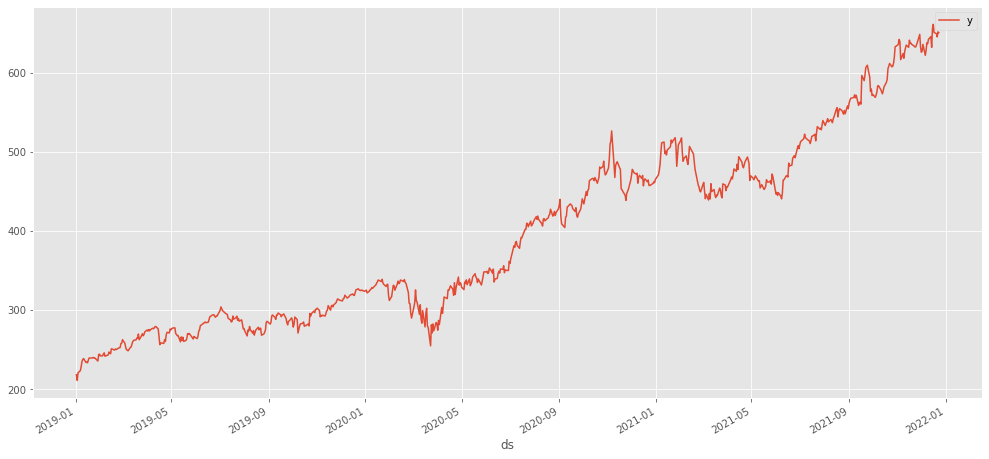

In [55]:
TMO_.plot(x="ds", y="y", figsize=(17,8))

In [51]:
plot_components_plotly(pro, pred)